In [1]:
import textstat

In [104]:
#generate readability score

import pandas as pd
from textstat import flesch_kincaid_grade

# Read the CSV file
#df = pd.read_csv('./lowCitedPRELLM/pbs_prellm_low.csv')
df = pd.read_csv('./lowCitedLLMERA/pbs_llmera_low.csv', encoding='latin1')


# Fill missing values in the GPT4Title column with an empty string
df['GPT4Title'].fillna('', inplace=True)

# Calculate Flesch-Kincaid Grade Level for AuthorsTitle
df['AuthorsTitle_FK_Grade'] = df['AuthorsTitle'].apply(flesch_kincaid_grade)

# Calculate Flesch-Kincaid Grade Level for GPT4Title
df['GPT4Title_FK_Grade'] = df['GPT4Title'].apply(lambda x: flesch_kincaid_grade(str(x)))

# Save the updated DataFrame back to the CSV file
df.to_csv('./results_llmera_low/pbs_llmera_low.csv', index=False)


In [105]:
#cosine_similarity with TF-IDF vectorizer

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import chardet

# Detect the encoding
with open('./results_llmera_low/pbs_llmera_low.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Load the dataset with the detected encoding and handle encoding errors
try:
    df = pd.read_csv('./results_llmera_low/pbs_llmera_low.csv', encoding=result['encoding'])
except UnicodeDecodeError:
    df = pd.read_csv('./results_llmera_low/pbs_llmera_low.csv', encoding='ISO-8859-1')

# Print the data types of all values in the AuthorsTitle column
#for value in df['AuthorsTitle']:
    #print(type(value))

# Fill NaN values in the 'GPT4Title' column with an empty string
df['GPT4Title'] = df['GPT4Title'].fillna("")

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the Abstract, AuthorsTitle, and GPT4Title columns
tfidf_matrix_abstract = tfidf_vectorizer.fit_transform(df['Abstract'])
tfidf_matrix_authors_title = tfidf_vectorizer.transform(df['AuthorsTitle'])
tfidf_matrix_gpt4_title = tfidf_vectorizer.transform(df['GPT4Title'])


# Calculate cosine similarities
cosine_similarities_authors_title = cosine_similarity(tfidf_matrix_abstract, tfidf_matrix_authors_title)
cosine_similarities_gpt4_title = cosine_similarity(tfidf_matrix_abstract, tfidf_matrix_gpt4_title)

# Add similarity scores to the DataFrame
df['AuthorsTitle_Similarity'] = [similarity for similarity in cosine_similarities_authors_title.diagonal()]
df['GPT_4Title_Similarity'] = [similarity for similarity in cosine_similarities_gpt4_title.diagonal()]

# Save the updated DataFrame to a new CSV file
df.to_csv('./results_llmera_low/pbs_llmera_low.csv', index=False)

In [112]:
# Calculate Levenshtein distance between AuthorsTitle and GPT4Title

import pandas as pd
from Levenshtein import distance

# Read the CSV file with 'latin-1' encoding
df = pd.read_csv('./results_llmera_top/pbs_llmera_top.csv', encoding='latin-1')

# Calculate Levenshtein distance between AuthorsTitle and GPT4Title
df['Levenshtein distance'] = df.apply(lambda row: 1 - distance(str(row['AuthorsTitle']), str(row['GPT4Title'])) / max(len(str(row['AuthorsTitle'])), len(str(row['GPT4Title']))), axis=1)

# Save the updated DataFrame back to the CSV file
df.to_csv('./results_llmera_top/pbs_llmera_top.csv', index=False)

In [107]:
#statistics or readability

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('./results_llmera_low/pbs_llmera_low.csv')

# Calculate mean and median
mean_authors_title = df['AuthorsTitle_FK_Grade'].mean()
median_authors_title = df['AuthorsTitle_FK_Grade'].median()

mean_gpt4_title = df['GPT4Title_FK_Grade'].mean()
median_gpt4_title = df['GPT4Title_FK_Grade'].median()

# Calculate additional statistics
statistics = df[['AuthorsTitle_FK_Grade', 'GPT4Title_FK_Grade']].describe()

# Print additional statistics
print("\nReadability statistics for pbs_llmera_low:")
print(statistics)


Readability statistics for pbs_llmera_low:
       AuthorsTitle_FK_Grade  GPT4Title_FK_Grade
count             108.000000          108.000000
mean               13.289815           15.682407
std                 4.430079            5.239887
min                 3.300000          -15.700000
25%                10.000000           13.100000
50%                12.900000           15.800000
75%                16.600000           18.200000
max                24.100000           28.000000


In [108]:
#Statistic for cosine similarity

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('./results_llmera_low/pbs_llmera_low.csv')

# Calculate mean and median
mean_authors_title = df['AuthorsTitle_Similarity'].mean()
median_authors_title = df['AuthorsTitle_Similarity'].median()

mean_gpt4_title = df['GPT_4Title_Similarity'].mean()
median_gpt4_title = df['GPT_4Title_Similarity'].median()

# Calculate additional statistics
statistics = df[['AuthorsTitle_Similarity', 'GPT_4Title_Similarity']].describe()


# Print additional statistics
print("\nCosine similarity statistics for pbs_llmera_low:")
print(statistics)



Cosine similarity statistics for pbs_llmera_low:
       AuthorsTitle_Similarity  GPT_4Title_Similarity
count               108.000000             108.000000
mean                  0.438757               0.400870
std                   0.149551               0.140499
min                   0.000000               0.000000
25%                   0.341009               0.302291
50%                   0.446304               0.431346
75%                   0.535661               0.492219
max                   0.821907               0.712669


In [109]:
#Calculating correlation

import pandas as pd

# Read the CSV file
df = pd.read_csv('./results_llmera_top/bam_llmera_top.csv')

# Calculate the correlation
correlation = df['Cites'].corr(df['GPT_4Title_Similarity'])

print(f'Correlation between AuthorsTitle_Similarity and GPT_4Title_Similarity: {correlation}')


Correlation between AuthorsTitle_Similarity and GPT_4Title_Similarity: 0.030308111070569712


In [120]:
import pandas as pd
from scipy.stats import ttest_rel

# Read the CSV file
df = pd.read_csv('./results_llmera_top/pbs_llmera_top.csv')

# Perform a paired t-test
t_statistic, p_value = ttest_rel(df['AuthorsTitle_FK_Grade'], df['GPT4Title_FK_Grade'])

# Print the results
print("Paired t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.")
else:
    print("There is no significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.")


Paired t-test results:
T-statistic: -2.967177117894984
P-value: 0.0037765085468455615
There is a significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.


In [122]:
import pandas as pd
from scipy.stats import f_oneway

# Read the CSV file
df = pd.read_csv('results_llmera_top/mh_llmera_top.csv')

# Perform ANOVA test
f_statistic, p_value = f_oneway(df['AuthorsTitle_FK_Grade'], df['GPT4Title_FK_Grade'])

# Print the results
print("ANOVA test results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.")
else:
    print("There is no significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.")


ANOVA test results:
F-statistic: nan
P-value: nan
There is no significant difference between AuthorsTitle_FK_Grade and GPT4Title_FK_Grade.


In [130]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the CSV file into a DataFrame
df = pd.read_csv('statistics.csv')

# Convert columns to numeric, coercing errors to NaN
df['a_bam_rd_era_top'] = pd.to_numeric(df['a_bam_rd_era_top'], errors='coerce')
df['a_bam_rd_pre_top'] = pd.to_numeric(df['a_bam_rd_pre_top'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['a_bam_rd_era_top', 'a_bam_rd_pre_top'])

# Perform t-test
t_statistic, p_value = ttest_ind(df['a_bam_rd_era_top'], df['a_bam_rd_pre_top'], equal_var=False)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -0.9310090372845762
P-value: 0.35304520011753193


In [10]:
import pandas as pd

# Read the CSV file with 'latin-1' encoding
df = pd.read_csv('./results/cs_llmera_top.csv', encoding='latin-1')

# Function to categorize Levenshtein distances
def categorize_distance(distance):
    if distance >= 0.00 and distance <= 0.10:
        return 'Very High Similarity'
    elif distance >= 0.11 and distance <= 0.20:
        return 'High Similarity'
    elif distance >= 0.21 and distance <= 0.30:
        return 'Moderate Similarity'
    elif distance >= 0.31 and distance <= 0.40:
        return 'Low Similarity'
    elif distance >= 0.41 and distance <= 1.00:
        return 'Very Low Similarity'
    else:
        return 'Invalid Distance'

# Apply the categorize_distance function to create a new column 'Similarity Category'
df['Similarity Category'] = df['Levenshtein distance'].apply(categorize_distance)

# Save the updated DataFrame back to the CSV file
df.to_csv('./results/cs_llmera_top_categorized.csv', index=False)


AuthorsTitle_FK_Grade - Mean: 12.499065420560747 Median: 12.3
GPT4Title_FK_Grade - Mean: 13.91682242990654 Median: 13.9


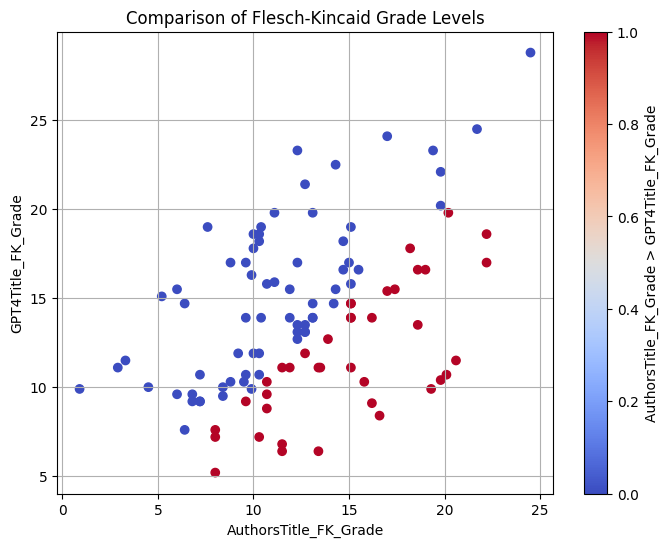

In [14]:
#Generate scatter plotS

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('pbs_top.csv')

# Calculate mean and median
mean_authors_title = df['AuthorsTitle_FK_Grade'].mean()
median_authors_title = df['AuthorsTitle_FK_Grade'].median()

mean_gpt4_title = df['GPT4Title_FK_Grade'].mean()
median_gpt4_title = df['GPT4Title_FK_Grade'].median()

print("AuthorsTitle_FK_Grade - Mean:", mean_authors_title, "Median:", median_authors_title)
print("GPT4Title_FK_Grade - Mean:", mean_gpt4_title, "Median:", median_gpt4_title)

# Create a scatter plot with different colors
plt.figure(figsize=(8, 6))
plt.scatter(df['AuthorsTitle_FK_Grade'], df['GPT4Title_FK_Grade'],
            c=df['AuthorsTitle_FK_Grade'] > df['GPT4Title_FK_Grade'], cmap='coolwarm')
plt.xlabel('AuthorsTitle_FK_Grade')
plt.ylabel('GPT4Title_FK_Grade')
plt.title('Comparison of Flesch-Kincaid Grade Levels')
plt.colorbar(label='AuthorsTitle_FK_Grade > GPT4Title_FK_Grade')
plt.grid(True)
plt.show()


In [17]:
#Generate Semantic Similarity

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read the CSV file
df = pd.read_csv('pbs_top.csv')

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the AuthorsTitle and GPT4Title columns
tfidf_matrix_authors = tfidf_vectorizer.fit_transform(df['AuthorsTitle'])
tfidf_matrix_gpt4 = tfidf_vectorizer.transform(df['GPT4Title'])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix_authors, tfidf_matrix_gpt4)

# Save cosine similarity scores in a new column
df['Semantic_Similarity'] = [similarity for similarity in cosine_similarities.diagonal()]

# Save the updated DataFrame back to the CSV file
df.to_csv('pbs_top.csv', index=False)


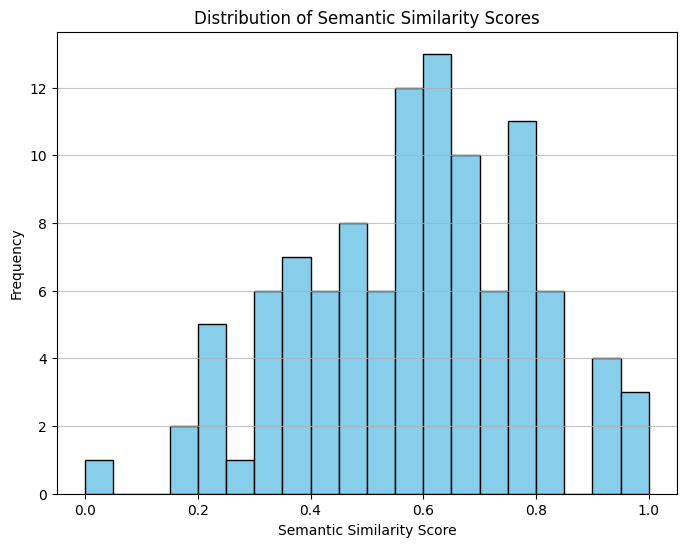

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('pbs_top.csv')

# Plot a histogram of the Semantic_Similarity scores
plt.figure(figsize=(8, 6))
plt.hist(df['Semantic_Similarity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Semantic Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Semantic Similarity Scores')
plt.grid(axis='y', alpha=0.75)
plt.show()

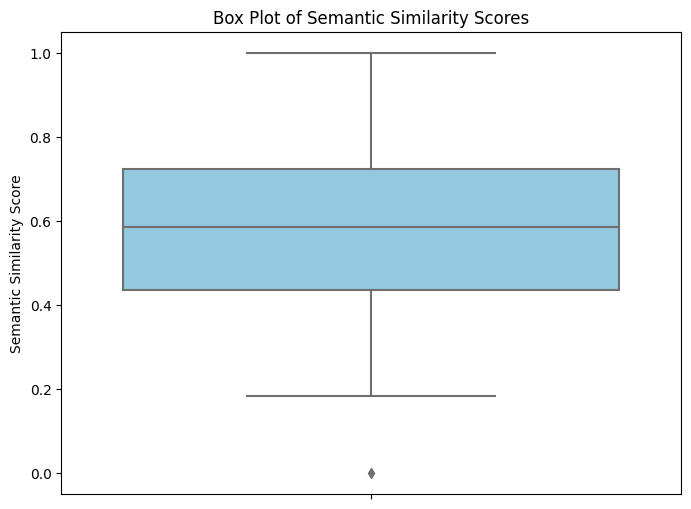

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('pbs_top.csv')

# Plot a histogram of the Semantic_Similarity scores
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Semantic_Similarity', data=df, color='skyblue')
plt.ylabel('Semantic Similarity Score')
plt.title('Box Plot of Semantic Similarity Scores')
plt.show()

In [2]:
# Calculate Levenshtein distance between AuthorsTitle and GPT4Title

import pandas as pd
from Levenshtein import distance

# Read the CSV file with 'latin-1' encoding
df = pd.read_csv('pbs_top_updated.csv', encoding='latin-1')

# Calculate Levenshtein distance between AuthorsTitle and GPT4Title
df['Semantic_Similarity_ld'] = df.apply(lambda row: 1 - distance(str(row['AuthorsTitle']), str(row['GPT4Title'])) / max(len(str(row['AuthorsTitle'])), len(str(row['GPT4Title']))), axis=1)

# Save the updated DataFrame back to the CSV file
df.to_csv('pbs_top_updated.csv', index=False)


In [9]:
#statistics or readability

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('pbs_top_updated_tfidfSMScores.csv')

# Calculate mean and median
mean_authors_title = df['AuthorsTitle_FK_Grade'].mean()
median_authors_title = df['AuthorsTitle_FK_Grade'].median()

mean_gpt4_title = df['GPT4Title_FK_Grade'].mean()
median_gpt4_title = df['GPT4Title_FK_Grade'].median()

# Calculate additional statistics
statistics = df[['AuthorsTitle_FK_Grade', 'GPT4Title_FK_Grade']].describe()

#print("AuthorsTitle_FK_Grade - Mean:", mean_authors_title, "Median:", median_authors_title)
#print("GPT4Title_FK_Grade - Mean:", mean_gpt4_title, "Median:", median_gpt4_title)

# Print additional statistics
print("\nReadability statistics:")
print(statistics)

# Create a scatter plot with different colors
#plt.figure(figsize=(8, 6))
#plt.scatter(df['AuthorsTitle_FK_Grade'], df['GPT4Title_FK_Grade'],
            #c=df['AuthorsTitle_FK_Grade'] > df['GPT4Title_FK_Grade'], cmap='coolwarm')
#plt.xlabel('AuthorsTitle_FK_Grade')
#plt.ylabel('GPT4Title_FK_Grade')
#plt.title('Comparison of Flesch-Kincaid Grade Levels')
#plt.colorbar(label='AuthorsTitle_FK_Grade > GPT4Title_FK_Grade')
#plt.grid(True)
#plt.show()



Readability statistics:
       AuthorsTitle_FK_Grade  GPT4Title_FK_Grade
count             100.000000          100.000000
mean               12.434343           13.816162
std                 4.559133            4.513878
min                 0.900000            5.200000
25%                 9.600000           10.300000
50%                12.300000           13.658081
75%                15.100000           16.700000
max                24.500000           28.800000


In [8]:
#Statistic for cosine similarity

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('pbs_top_updated_tfidfSMScores.csv')

# Calculate mean and median
mean_authors_title = df['AuthorsTitle_Similarity'].mean()
median_authors_title = df['AuthorsTitle_Similarity'].median()

mean_gpt4_title = df['GPT_4Title_Similarity'].mean()
median_gpt4_title = df['GPT_4Title_Similarity'].median()

# Calculate additional statistics
statistics = df[['AuthorsTitle_Similarity', 'GPT_4Title_Similarity']].describe()


# Print additional statistics
print("\nCosine similarity statistics:")
print(statistics)



Cosine similarity statistics:
       AuthorsTitle_Similarity  GPT_4Title_Similarity
count               100.000000             100.000000
mean                  0.344990               0.320999
std                   0.146639               0.134245
min                   0.000000               0.000000
25%                   0.247291               0.231171
50%                   0.346651               0.317748
75%                   0.439193               0.409025
max                   0.672856               0.655438
